# 1. Introduction to iterators

## Iterating with a for loop
* We can iterate over a list using a for loop

In [ ]:
employees = ['Nick', 'Lore', 'Hugo']

for employee in employees:
    print(employee)

* We can iterate over a string using a for loop

In [ ]:
for letter in'Python':
    print(letter)

* We can iterate over a range object using a for loop

In [ ]:
for i in range(4):
    print(i)

## Iterators vs .iterables

* Iterable
 * Examples: lists, strings, dictionaries, file connections
 * An object with anassociated `iter()` method
 * Applying `iter()` to an iterable creates an iterator
* Iterator
 * Produces next value with `next()`


## Iterating over iterables: `next()`

In [1]:
word = 'Py'
it = iter(word)
next(it)

'P'

In [ ]:
next(it)

In [ ]:
next(it)

In [ ]:
# Create an iterator for range(10 ** 100): googol
googol = iter(range(10**100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

## Iterating at once with `*`

In [ ]:
word = 'Python'
it = iter(word)
print(*it)

In [ ]:
print(*it)

* No more values to go through!


## Iterating over dictionaries

In [2]:
pythonistas = {'hugo': 'bowne-anderson', 'francis': 'castro'}
for key, value in pythonistas.items():
    print(key, value)

hugo bowne-anderson
francis castro


## Iterating over file connections

In [ ]:
file = open('file.txt')
it = iter(file)
print(next(it))

In [ ]:
print(next(it))

#2. Playing with iterators

## Using `enumerate()`

In [ ]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
e = enumerate(avengers)
print(type(e))

In [ ]:
e_list = list(e)
print(e_list)

## `enumerate()` and unpack

In [ ]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
for index, value in enumerate(avengers):
    print(index, value)

In [ ]:
for index, value in enumerate(avengers, start=10):
    print(index, value)

## Using `zip()`

In [ ]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']
z = zip(avengers, names)
print(type(z))

In [ ]:
z_list = list(z)
print(z_list)

## `zip()` and unpack


In [ ]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']
for z1, z2 in zip(avengers, names):
    print(z1, z2)

## Print zip with `*`

In [3]:
avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']
z = zip(avengers, names)
print(*z)

('hawkeye', 'barton') ('iron man', 'stark') ('thor', 'odinson') ('quicksilver', 'maximoff')


# 3. Using iterators to load large files in to memory

## Loading data in chunks
* There can be too much data to hold in memory
* Solution: load data in chunks!
* Pandas function: `read_csv()`
 * Specify the chunk: `chunk_size`

## Iterating over data

In [ ]:
import pandas as pd

result = []
for chunk in pd.read_csv('data.csv', chunksize=1000):
    result.append(sum(chunk['x']))

total = sum(result)
print(total)

In [ ]:
import pandas as pd

total = 0
for chunk in pd.read_csv('data.csv', chunksize=1000):
    total += sum(chunk['x'])

print(total)

* Use Case Example :

In [ ]:
# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('tweets.csv',10,'lang')

# Print result_counts
print(result_counts)

# 4. List comprehensions

* Populate a list with a for loop

In [ ]:
nums = [12, 8, 21, 3, 16]
new_nums = []
for num in nums:
    new_nums.append(num + 1)
print(new_nums)

## A list comprehension

In [ ]:
nums = [12, 8, 21, 3, 16]
new_nums = [num + 1 for num in nums]
print(new_nums)

## For loop and list comprehension syntax

In [ ]:
new_nums = [num + 1 for num in nums]

In [ ]:
for num in nums:
    new_nums.append(num + 1)
print(new_nums)

## List comprehension with `range()`

In [ ]:
result = [num for num in range(11)]
print(result)

## List comprehensions
* Collapse for loops for building lists into a single line
* Components
 * Iterable
 * Iterator variable (represent members of iterable)
 * Output expression

## Nested loops (1)


In [ ]:
pairs_1 = []

for num1 in range(0, 2):
    for num2 in range(6, 8):
        pairs_1.append(num1, num2)

print(pairs_1)

* How to do this with a list comprehension?


## Nested loops (2)

In [ ]:
pairs_2 = [(num1, num2) for num1 in range(0, 2) for num2 in range(6, 8)]
print(pairs_2)

* Tradeoff: readability

# 5. Advanced comprehensions
## Conditionals in comprehensions
* Conditionals on the iterable

In [ ]:
[num ** 2 for num in range(10) if num % 2 == 0]

* Python documentationon the `%` operator: The `%` (modulo) operator yields the remainder from the division of the first argument by the second.

In [ ]:
5 % 2

In [ ]:
6 % 2

##  Conditionals in comprehensions
* Conditionals on the output expression

In [ ]:
[num ** 2if num % 2 == 0 else 0for num in range(10)]

## Dict comprehensions
* Create dictionaries
* Use curly braces `{}` instead of brackets `[]`

In [ ]:
pos_neg = {num: -num for num in range(9)}
print(pos_neg)

In [ ]:
print(type(pos_neg))

In [4]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member:len(member) for member in fellowship}

# Print the new dictionary
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


#6. Introduction to generator expressions
## Generator expressions
* Recal llist comprehension

In [ ]:
[2 * num for num in range(10)]

* Use `( )` instead of `[ ]`

In [ ]:
(2 * num for num in range(10))

##List comprehensions vs. generators
* List comprehension - returns a list
* Generators - returns a generator object
* Both can be iterated over

## Printing values from generators (1)

In [ ]:
result = (num for num in range(6))
for num in result:
    print(num)

In [ ]:
result = (num for num in range(6))
print(list(result))

## Printing values from generators (2)

In [ ]:
result = (num for num in range(6))

* Lazy evaluation

In [ ]:
print(next(result))

In [ ]:
print(next(result))

In [ ]:
print(next(result))

In [ ]:
print(next(result))

## Generators vs list comprehensions
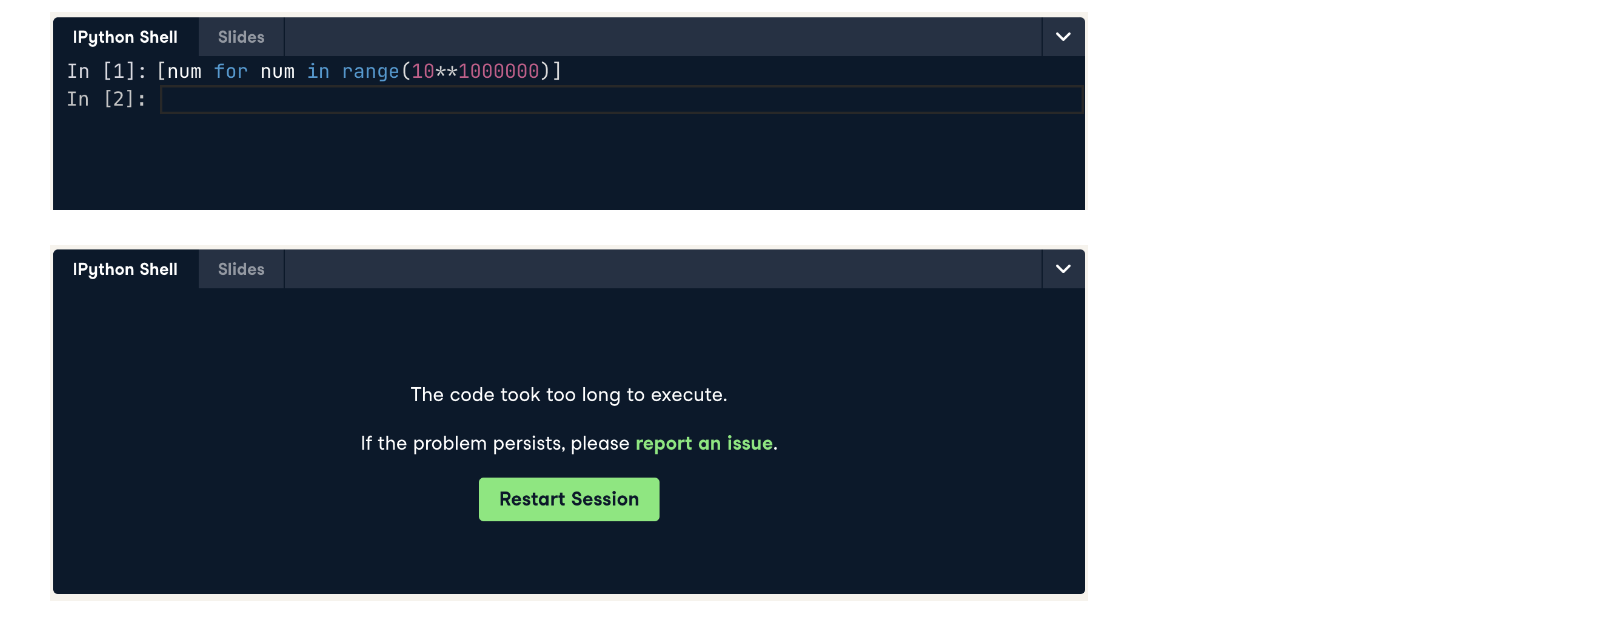

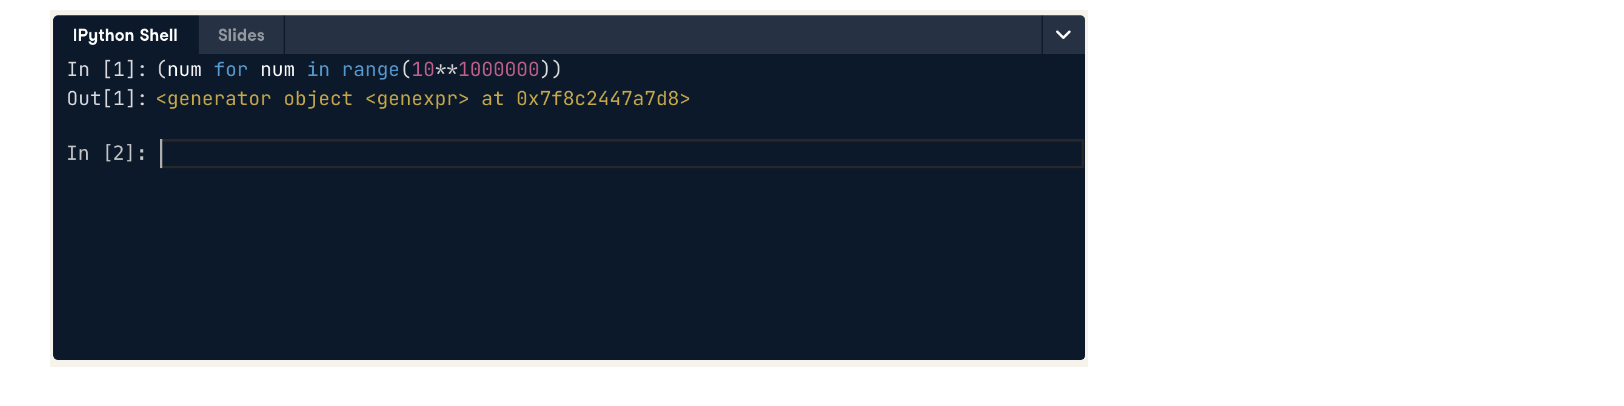

## Conditionals in generator expressions

In [ ]:
even_nums = (num for num in range(10) if num % 2 == 0)
print(list(even_nums))

## Generator functions
* Produces generator objects when called
* Defined like a regular function - `def`
* Yields a sequence of values instead of returning a single value
* Generates a value with `yield` keyword

## Build a generator function
* sequence.py


In [ ]:
def num_sequence(n):
    """Generate values from 0 to n."""
    i = 0
    while i < n:
        yield i
        i += 1


## Use a generator function

In [ ]:
result = num_sequence(5)
print(type(result))

In [ ]:
for item in result:
    print(item)

# 7. Wrapping up comprehensions and generators.
## Re-cap: list comprehensions
* Basic


```
[output expression for iterator variable in iterable]
```


* Advanced


```
[output expression +
conditional on output for iterator variable in iterable +
conditional on iterable]
```




In [ ]:
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)

# 8. Python generators for streaming data
## Generators for the large data limit
* Use a generator to load a file line by line
* Works on streaming data!
* Read and process the file until all lines are exhausted

## Reading files in chunks
* Up next:
 * `read_csv()` function and `chunk_size` argument
 * Look at specic indicators in specific countries
 * Write a function to generalize tasks



In [ ]:
import matplotlib.pyplot as plt


# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

    # Concatenate DataFrame chunk to the end of data: data
    data = pd.concat([data,df_pop_ceb])

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()